In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans


color = sns.color_palette()

df_diagnosis = pd.read_csv('breast_cancer.csv', usecols=[1,2,3,4,5,6,7,8,9,10,11])
# Omitting y values
df_no_diagnosis = pd.read_csv('breast_cancer.csv', usecols=[2,3,4,5,6,7,8,9,10,11])
# Covert M to 1 and B to 0
df_diagnosis['diagnosis'] = (df_diagnosis['diagnosis'] !='B').astype(int)
y = df_diagnosis["diagnosis"].values
X = df_diagnosis.drop(['diagnosis'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# print head
df_diagnosis.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


# Continuous Features

In [ ]:
continuous = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
              "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean"]
fig,ax=plt.subplots(5,2,figsize=(18,22))
for i in range(len(continuous)):
    plt.subplot(5,2,i+1)
    sns.distplot(df_diagnosis.loc[:,continuous[i]],kde=True, color='blue')

In [ ]:
k = len(df_no_diagnosis.columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df_no_diagnosis.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

#### Correlation Matrix

In [ ]:
# Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(df_no_diagnosis.corr(), annot=True,fmt=".0%")
plt.show()

# K-Means

In [ ]:
fig, ax = plt.subplots(4, 4, figsize = (15, 15))
fig.tight_layout(pad = 5.0)

column_headers = list(df_diagnosis.columns.values)
for i in range(11):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x = column_headers[i], y = 'diagnosis', data = df_diagnosis, color = 'purple')

for i in range(2):
    plt.subplot(4, 3, i + 11, visible = False)

To figure out what subset of the data to run the K-Means algorithm on, we first plotted the data based on its attributes. The data is shown with each of the 10 different attributes against the diagnosis -illustrated as 1 if the diagnosis for breast cancer is maglinant, and 0 if benign.  

In [ ]:
fig, ax = plt.subplots(9, 9, figsize = (15, 15))
fig.tight_layout(pad = 1.5)

column_headers = list(df_no_diagnosis.columns.values)
xval, yval = 0, 1

for i in range(45):
    plt.subplot(5, 9, i + 1)
    sns.scatterplot(x = column_headers[xval], y = column_headers[yval], data = df_diagnosis, hue = 'diagnosis', palette = ['purple', 'red'], legend = False)
    yval += 1
    if yval > len(column_headers) or yval == len(column_headers):
        column_headers.pop(0)
        yval = 1
        

The first approach did not tell us much information, so in this step we plotted each of the attributes against each other to see which pair's data points look interesting. Each of these data points are shown as either purple if breast lump is benign or red if it is maglinant. After inspecting the graph, it seems to us that all 45 attribute pairs would would yield promising results from running a K-means algorithm.

In [ ]:
fig, ax = plt.subplots(15, 3, figsize = (15, 30))
fig.tight_layout(pad = 5)

column_headers = list(df_no_diagnosis.columns.values)
xval, yval = 0, 1

for j in range(45):
    distortions = []
    X = df_diagnosis[[column_headers[xval], column_headers[yval]]].to_numpy() 
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.subplot(15, 3, j + 1)
    plt.plot(range(1, 11), distortions, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plotTitle = column_headers[xval] + ' vs ' + column_headers[yval]
    plt.title(plotTitle)
    
    yval += 1
    if yval > len(column_headers) or yval == len(column_headers):
        column_headers.pop(0)
        yval = 1


After running the K-means algorithm on all the attribute relationships, we graphed the number of clusters against the distortion in order to attempt to use the elbow method to see the optimal number of clusters to use for each situation.

# Logistic Regression


0.8936170212765957
[[-4.02637744  0.19666446  0.39599128  0.02620724  0.23912062  0.81453469
   1.12369318  0.52673504  0.4067601   0.0631069 ]]
[[0.01783884 1.2173355  1.48585637 1.02655367 1.27013173 2.2581247
  3.0761942  1.6933944  1.50194375 1.0651407 ]]


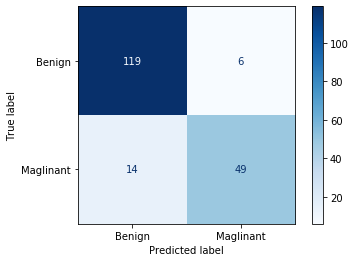

In [26]:
log_reg = LogisticRegression(solver="liblinear").fit(X_train, y_train)
print(log_reg.score(X_test, y_test))
print(log_reg.coef_)
print(np.exp(log_reg.coef_))
LR_ypred = log_reg.predict(X_test)
LRconmat = confusion_matrix(y_test, LR_ypred)
ConfusionMatrixDisplay(LRconmat,["Benign", "Maglinant"]).plot(cmap = "Blues", values_format = ".3g") 

# Naive Bayes


0.6648936170212766
[[232. 232. 232. 232. 232. 232. 226. 226. 232. 232.]
 [149. 149. 149. 149. 149. 149. 149. 149. 149. 149.]]
[[-0.00428266 -0.00428266 -0.00428266 -0.00428266 -0.00428266 -0.00428266
  -0.0303711  -0.0303711  -0.00428266 -0.00428266]
 [-0.00664454 -0.00664454 -0.00664454 -0.00664454 -0.00664454 -0.00664454
  -0.00664454 -0.00664454 -0.00664454 -0.00664454]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


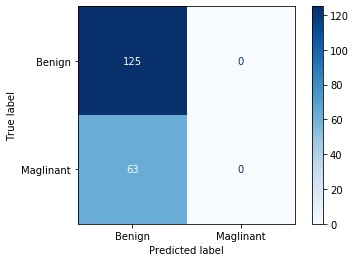

In [24]:
bnb = BernoulliNB().fit(X_train, y_train)
print(bnb.score(X_test, y_test))
print(bnb.feature_count_)
print(bnb.feature_log_prob_)
NB_ypred = bnb.predict(X_test)
print(NB_ypred)
NBconmat = confusion_matrix(y_test, NB_ypred)
ConfusionMatrixDisplay(NBconmat,["Benign", "Maglinant"]).plot(cmap = "Blues", values_format = ".3g") 

# Principle Component Analysis


In [ ]:
#standardize data
column_headers = list(df_no_diagnosis.columns.values)
x = df_no_diagnosis.loc[:, column_headers].values
y = df_diagnosis.loc[:, ['diagnosis']].values
print(x.shape)
print(y.shape)
x = StandardScaler().fit_transform(x)

print(column_headers)
#covariance matrix
covar_matrix = PCA(n_components = 10)
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals = 3) * 100)
print(var)

#plot features against variance
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.plot(var)



 # Decision Trees and Random Forest


In [4]:
# imports for the section
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('breast_cancer.csv') 

## Random Forest w/o any Pruning 

In [5]:
#Model import
model = RandomForestClassifier(n_estimators= 100)
#Features  
feature_names = list(df.columns[2:12])
#Train
model.fit(X_train, y_train)
print(X_train.shape)
#Pred
y_pred = model.predict(X_test)

(381, 10)


### Prediction Accuracy

In [6]:
model.score(X_test, y_test) 

0.9414893617021277

[0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 1]
[0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 1]


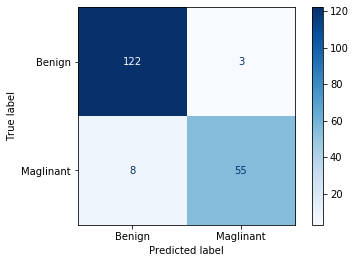

In [21]:
conmat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conmat,["Benign", "Maglinant"]).plot(cmap = "Blues", values_format = ".3g") 


### Print Tree

In [8]:
# Extract single tree
estimator = model.estimators_[3]

# Export as dot file
export_graphviz(estimator, out_file='RandomForest.dot', 
                feature_names = feature_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'RandomForest.dot', '-o', 'RandomForest.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'RandomForest.png')

## Rate Feature Importance

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators = 250, random_state = 0)
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

Feature ranking:
1. feature 7 (0.201742)
2. feature 6 (0.149524)
3. feature 2 (0.144104)
4. feature 0 (0.137678)
5. feature 3 (0.132474)
6. feature 5 (0.073564)
7. feature 1 (0.066912)
8. feature 8 (0.033845)
9. feature 4 (0.033678)
10. feature 9 (0.026479)


<function matplotlib.pyplot.show(*args, **kw)>

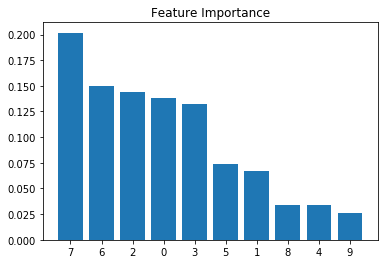

In [12]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
D = {}
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    D[indices[f]] = importances[indices[f]]
plot = plt.bar(range(len(D)), list(D.values()), align='center')
plt.title('Feature Importance')
plt.xticks(range(len(D)), list(D.keys()))
plt.show
# my_plot = importances.plot(kind='bar')


## Random Forest with Reduced Dimensions

In [13]:
model_reduced = RandomForestClassifier(n_estimators = 50, max_depth = 4 )

print(X_train[0])
X_train_new = X_train[:,[7, 2, 6, 3, 0]]
X_test_new = X_test[:,[7, 2, 6, 3, 0]]

X_reduced_features_names = ('concave_points_mean', 'perimeter_mean', 'concavity_mean', 'area_mean', 'radius_mean')

model_reduced.fit(X_train_new,y_train)

y_pred_reduced = model_reduced.predict(X_test_new)

[2.094e+01 2.356e+01 1.389e+02 1.364e+03 1.007e-01 1.606e-01 2.712e-01
 1.310e-01 2.205e-01 5.898e-02]


### Predict Accuracy

In [14]:
model_reduced.score(X_test_new, y_test)

0.925531914893617

In [ ]:
from sklearn.metrics import confusion_matrix
conmat2 = confusion_matrix(y_test, y_pred_reduced)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(conmat2,["Benign", "Maglinant"]).plot(cmap = "Blues", values_format = ".3g") 


### Print Tree

In [ ]:
# Extract single tree
estimator = model_reduced.estimators_[3]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='RandomForest2.dot',
                feature_names = X_reduced_features_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'RandomForest2.dot', '-o', 'RandomForest2.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'RandomForest2.png')